Всем привет. Сегодня мы проведём очередное исследование. Его целью является: используя наш набор данных, классифицировать его с помощью логистической регрессии. Для этого используем определённый признак, что характерно для логистической регрессии. Этим признаком у нас будет лучший процент побед из игры Clash Royale.

Импортируем все необходимые для работы библиотеки:

In [ ]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

Инициализируем нашу статистику с игры Clash Royale. Преобразуем в бинарный тип данных лучший процент побед, если он превышает условное значение 80:

In [ ]:
columns = [
    'Редкость',
    'Скорость атаки',
    'Здоровье',
    'Урон по области',
    'Урон в секунду',
    'Цена',
    'Дальность',
    'Скорость',
    'Лучший процент побед'
]
index = ['Рыцарь', 'Лучницы', 'Гоблины', 'Голблин-гигант', 'Гигант', 'П.Е.К.К.А.', 'Миньоны', 'Шар', 'Ведьма', 'Варвары',
         'Голем', 'Скелеты', 'Валькирия', 'Армия скелетов', 'Подрывник', 'Мушкетер', 'Принцесса', 'Три мушкетера', 'Адская гончая', 'Спарки',
         'Мегаминьон', 'Гоблин с дротиками', 'Банда гоблинов', 'Громовержец', 'Элитные варвары', 'Охотник', 'Палач', 'Бандитка',
         'Королевские рекруты', 'Ночная ведьма', 'Летучие мыши', 'Королевский призрак', 'Всадница на баране']
values =[
    [1, 1.2, 1607, 184, 153, 3, 1, 1, 90.89],
    [1, 0.9, 277, 97, 107, 3, 5, 0.9, 91.37],
    [1, 1.1, 184, 109, 99, 2, 1, 0.25, 75.77],
    [3, 1.5, 3044, 160, 106, 6, 1, 1, 79.43],
    [2, 1.5, 3724, 231, 154, 5, 1, 1, 91.37],
    [3, 1.8, 3431, 744, 413, 7, 1, 1.5, 92.50],
    [1, 1.0, 209, 107, 107, 3, 1, 0.5, 91.37],
    [3, 2.0, 1533, 584, 292, 5, 1, 1, 91.37],
    [3, 1.1, 765, 122, 110, 5, 5.5, 1, 72.00],
    [1, 1.3, 610, 174, 133, 5, 1, 1, 91.37],
    [3, 2.5, 4672, 284, 113, 8, 1, 1.5, 77.37],
    [1, 1.0, 74, 74, 74, 1, 1, 0.5, 90.89],
    [2, 1.5, 1737, 243, 162, 4, 1, 1, 82.22],
    [3, 1.0, 74, 74, 74, 3, 1, 0.5, 85.29],
    [1, 1.8, 302, 202, 112, 2, 4.5, 1, 83.52],
    [2, 1.0, 656, 198, 198, 4, 6, 1, 88.31],
    [4, 3.0, 237, 154, 51, 3, 9, 1, 74.34],
    [2, 1.0, 656*3, 198*3, 198*3, 3*3, 6, 1, 80.00],
    [4, 1.3, 3256, 49, 37, 7, 3.5, 1.5, 99.52],
    [4, 4.0, 1320, 1210, 302, 6, 5, 1.5, 75.77],
    [2, 1.5, 762, 283, 188, 3, 1, 1, 68.62],
    [2, 0.7, 237, 119, 170, 3, 6.5, 0.25, 100.00],
    [1, 1.1, 184, 109, 99, 3, 1, 0.25, 70.75],
    [4, 1.8, 649, 200, 110, 4, 5.0, 0.5, 92.31],
    [1, 1.4, 1220, 349, 249, 6, 1, 0.5, 88.00],
    [3, 2.2, 765, 77, 35, 4, 4.0, 1, 86.67],
    [3, 2.4, 1168, 154*2, 64*2, 5, 4.5, 1.0, 83.33],
    [4, 1.0, 825, 176, 176, 3, 1, 0.5, 67.27],
    [1, 1.3, 484+219, 121, 93, 7, 1, 1, 65.81],
    [4, 1.3, 825, 286, 220, 4, 1, 1, 76.00],
    [1, 1.3, 74, 74, 56, 2, 1, 0.25, 74.36],
    [4, 1.8, 1100, 237, 131, 3, 1, 0.5, 72.00],
    [4, 1.8, 1607, 242+484, 134, 5, 1, 1, 90.00]
]
# Итак, выше - данные с игры, которую я проанализировал и взял данные, где колонки - это характеристики бойцов, указанных в индексах
for i in range(len(values)):
  if values[i][-1] >= 80:
    values[i][-1] = 1
  else:
    values[i][-1] = 0
data = {}

for i in range(len(columns)):
    data[columns[i]] = []
    for i2 in range(len(index)):
        data[columns[i]].append(values[i2][i])
# Создание словаря, объединяющий все данные и колонки воедино

df = pandas.DataFrame(data, index=index)
# Создание типа данных библиотеки Pandas, где вместо номеров (индексов) используются названия персонажей для понятности отображения

df.fillna(0.0)
print('Преобразованная модель массива:')
# Проведение функции, проверяющий целостность массива и заполняющий его недостающими значениями в случае утраты сегмента данных
df

Преобразованная модель массива:


,Редкость,Скорость атаки,Здоровье,Урон по области,Урон в секунду,Цена,Дальность,Скорость,Лучший процент побед
Рыцарь,1,1.2,1607,184,153,3,1.0,1.00,1
Лучницы,1,0.9,277,97,107,3,5.0,0.90,1
Гоблины,1,1.1,184,109,99,2,1.0,0.25,0
Голблин-гигант,3,1.5,3044,160,106,6,1.0,1.00,0
Гигант,2,1.5,3724,231,154,5,1.0,1.00,1
П.Е.К.К.А.,3,1.8,3431,744,413,7,1.0,1.50,1
Миньоны,1,1.0,209,107,107,3,1.0,0.50,1
Шар,3,2.0,1533,584,292,5,1.0,1.00,1
Ведьма,3,1.1,765,122,110,5,5.5,1.00,0
Варвары,1,1.3,610,174,133,5,1.0,1.00,1


Разделим набор данных на тренировочный и тестовый:

In [ ]:
X1 = df[['Редкость',
    'Скорость атаки',
    'Здоровье',
    'Урон по области',
    'Урон в секунду',
    'Цена',
    'Дальность',
    'Скорость']]
Y1 = df['Лучший процент побед']

X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.3, train_size=0.7,
random_state=42)

Возьмем параметры и с помощью метода логистической регресии попытаемся подобрать лучшие гиперпараметры методом GridSearchCV:

In [ ]:
def split_scale(df, target, scaler=StandardScaler()):



    # Separate X and y
    target = target
    y = df[target]
    X = df.drop(target, axis=1)

    # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

    # Get list of column names
    cols = X_train.columns

    # Scale columns
    scaler = scaler
    X_train = pandas.DataFrame(scaler.fit_transform(X_train), columns=cols)
    X_test = pandas.DataFrame(scaler.transform(X_test), columns=cols)

    return X_train, X_test, y_train, y_test

def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4,
                   figsize=(10,5), params=False):


    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)

    # Classification Report / Scores

    print("****CLASSIFICATION REPORT - TRAINING DATA****")

    print(metrics.classification_report(y_train,y_hat_train, digits=digits))


    print("****CLASSIFICATION REPORT - TEST DATA****")

    print(metrics.classification_report(y_test,y_hat_test, digits=digits))

    print("****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****")


    fig, axes = plt.subplots(ncols=2,
                             figsize=figsize)

    # Confusion Matrix
    metrics.ConfusionMatrixDisplay.from_estimator(model, X_test,
                                  y_test,normalize='true',
                                 cmap='Purples',ax=axes[0])
    axes[0].set_title('Confusion Matrix')

    # Plot ROC Curve
    metrics.RocCurveDisplay.from_estimator(model,X_test,y_test,ax=axes[1])

    ax = axes[1]
    ax.legend()
    ax.plot([0,1],[0,1], ls='-')
    ax.grid()
    ax.set_title('ROC AUC Curve')

    plt.tight_layout()
    plt.show()

    if params == True:
        print("****MODEL PARAMETERS****")
        params = pandas.DataFrame(pandas.Series(model.get_params()))
        params.columns=['parameters']
        display(params)

def fit_eval(model, X_train, y_train, X_test, y_test, digits=4,
             figsize=(10,5), params=False):

    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits,
                   figsize=figsize, params=params)

    return model

In [ ]:
X_train_select, X_test_select, y_train_select, \
                y_test_select = split_scale(df, 'Лучший процент побед')

In [ ]:
# проведём поиск лучших гиперпараметров
log_reg = LogisticRegression(random_state=42)

params = {'C': [0.001, 0.01, 0.1, 1, 10, 100,1e6,1e12],
          'penalty': ['l1', 'l2', 'elastic_net'],
          'fit_intercept': [True, False],
          'solver':["liblinear", "newton-cg", "lbfgs", "sag","saga"],
          'class_weight': ['balanced']}
log_grid = GridSearchCV(log_reg, params, scoring='recall_macro')
log_grid.fit(X_train_select, y_train_select)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000000.0,
                               1000000000000.0],
                         'class_weight': ['balanced'],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elastic_net'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='recall_macro')

Посмотрим наши лучшие гиперпараметры:

In [ ]:
log_grid.best_params_

{'C': 1000000000000.0,
 'class_weight': 'balanced',
 'fit_intercept': True,
 'penalty': 'l2',
 'solver': 'lbfgs'}

Оценим модель с лучшими гиперпараметрами:

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7857    1.0000    0.8800        11
           1     1.0000    0.8235    0.9032        17

    accuracy                         0.8929        28
   macro avg     0.8929    0.9118    0.8916        28
weighted avg     0.9158    0.8929    0.8941        28

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.5000    0.5000    0.5000         2
           1     0.6667    0.6667    0.6667         3

    accuracy                         0.6000         5
   macro avg     0.5833    0.5833    0.5833         5
weighted avg     0.6000    0.6000    0.6000         5

****CONFUSION MATRIX AND ROC-AUC VISUALIZATION****


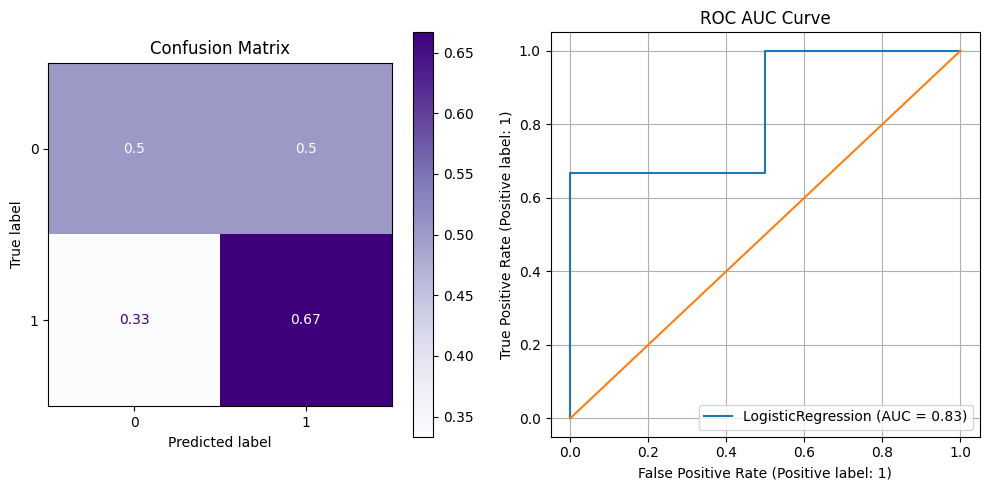

****MODEL PARAMETERS****


,parameters
C,1000000000000.0
class_weight,balanced
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l2


In [ ]:
evaluate_model(log_grid.best_estimator_, X_train_select, y_train_select, \
               X_test_select, y_test_select, params=True)

Мы видим явление переобучения. В результате мы получили не самые удовлетворительные результаты (лучшее в 0.67). Важно скореектировать наши данные в преспективе, чтобы улучшить данные. При этом на тренировочных данных результат лучше.

Нам удалось взять и инициализировать набор данных с игры Clash Royale, использовать метод логистической регресии, мы подобрали лучшие гиперпараметры методом GridSearchCV. Нам пришлось перевести процент лучших побед в бинарное значение, чтобы подобрать гиперпараметры, что нам успешно удалось выполнить. Исследование подошло к концу.